In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Read data
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
metadata = pd.read_csv('metadata.csv')

In [4]:
# Drop id column from metadata
metadata.drop('ID', axis=1, inplace=True)
metadata.drop('UpsellDate', axis=1, inplace=True)

# Drop ID column from train and test
train.drop('ID', axis=1, inplace=True)
test.drop('ID', axis=1, inplace=True)

# Merge metadata with train and test
train = pd.concat([train, metadata], axis=1)
test = pd.concat([test, metadata], axis=1)

In [5]:
test.shape, train.shape

((37343, 20), (37343, 26))

In [13]:
# I need my train and test to have 56016 rows so we will have to create dummy rows
# for the test set and fill them with random values
import random
random.seed(42) # Set seed for reproducibility
train = pd.concat([train, pd.DataFrame(np.random.randn(18673, 27), columns=train.columns)], ignore_index=True)
test = pd.concat([test, pd.DataFrame(np.random.randn(18673, 26), columns=test.columns)], ignore_index=True)
train.shape, test.shape


((56016, 27), (56016, 26))

In [6]:
train['TransactionDates'].fillna(train['TransactionDates'].mode()[0], inplace=True)
train['PaymentsHistory'].fillna(train['PaymentsHistory'].mode()[0], inplace=True)

test['TransactionDates'].fillna(test['TransactionDates'].mode()[0], inplace=True)
test['PaymentsHistory'].fillna(test['PaymentsHistory'].mode()[0], inplace=True)

# For m1 to m6
train['m1'].fillna(train['m1'].mode()[0], inplace=True) 
train['m2'].fillna(train['m2'].mode()[0], inplace=True)
train['m3'].fillna(train['m3'].mode()[0], inplace=True)
train['m4'].fillna(train['m4'].mode()[0], inplace=True)
train['m5'].fillna(train['m5'].mode()[0], inplace=True)
train['m6'].fillna(train['m6'].mode()[0], inplace=True)


# Imputing age and religion
train['Age'].fillna(train['Age'].mean(), inplace=True)
train['Region'].fillna(train['Region'].mode()[0], inplace=True)

test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Region'].fillna(test['Region'].mode()[0], inplace=True)

train.isnull().any().sum()

0

In [7]:
# Change gender column name
train.rename(columns={'MainApplicantGender': 'Gender'}, inplace=True)

# ExpectedTermDate	FirstPaymentDate	LastPaymentDate
# Convert to datetime

# ExpectedTermDate
train['ExpectedTermDate'] = pd.to_datetime(train['ExpectedTermDate'], errors='coerce')
test['ExpectedTermDate'] = pd.to_datetime(test['ExpectedTermDate'], errors='coerce')

# FirstPaymentDate
train['FirstPaymentDate'] = pd.to_datetime(train['FirstPaymentDate'], errors='coerce')
test['FirstPaymentDate'] = pd.to_datetime(test['FirstPaymentDate'], errors='coerce')

# LastPaymentDate
train['LastPaymentDate'] = pd.to_datetime(train['LastPaymentDate'], errors='coerce')
test['LastPaymentDate'] = pd.to_datetime(test['LastPaymentDate'], errors='coerce')

# Extract month, day and year
# ExpectedTermDate
train['ExpectedTermDate_year'] = train['ExpectedTermDate'].dt.year
train['ExpectedTermDate_month'] = train['ExpectedTermDate'].dt.month
train['ExpectedTermDate_day'] = train['ExpectedTermDate'].dt.day

 # FirstPaymentDate
train['FirstPaymentDate_year'] = train['FirstPaymentDate'].dt.year
train['FirstPaymentDate_month'] = train['FirstPaymentDate'].dt.month
train['FirstPaymentDate_day'] = train['FirstPaymentDate'].dt.day

# LastPaymentDate
train['LastPaymentDate_year'] = train['LastPaymentDate'].dt.year
train['LastPaymentDate_month'] = train['LastPaymentDate'].dt.month
train['LastPaymentDate_day'] = train['LastPaymentDate'].dt.day

# m1 to m6 our targets are the next six payments which we will predict
train['Target'] = train['m1'] + train['m2'] + train['m3'] + train['m4'] + train['m5'] + train['m6']


In [8]:
train['Target'] = np.log1p(train['Target'])

# Convert age to number instead of float
train['Age'] = train['Age'].astype(int)

In [9]:
# Extract month, day and year
# ExpectedTermDate
# Convert it to datetime
#test['ExpectedTermDate'] = pd.to_datetime(test['ExpectedTermDate'])

# Extract month, day and year
test['ExpectedTermDate_month'] = test['ExpectedTermDate'].dt.month
test['ExpectedTermDate_day'] = test['ExpectedTermDate'].dt.day
test['ExpectedTermDate_year'] = test['ExpectedTermDate'].dt.year

# FirstPaymentDate
# Convert it to datetime
#test['FirstPaymentDate'] = pd.to_datetime(test['FirstPaymentDate'])

# Extract month, day and year
test['FirstPaymentDate_month'] = test['FirstPaymentDate'].dt.month
test['FirstPaymentDate_day'] = test['FirstPaymentDate'].dt.day
test['FirstPaymentDate_year'] = test['FirstPaymentDate'].dt.year

# LastPaymentDate
# Convert it to datetime
#test['LastPaymentDate'] = pd.to_datetime(test['LastPaymentDate'])

# Extract month, day and year
test['LastPaymentDate_month'] = test['LastPaymentDate'].dt.month
test['LastPaymentDate_day'] = test['LastPaymentDate'].dt.day
test['LastPaymentDate_year'] = test['LastPaymentDate'].dt.year

# Renam gender column
test.rename(columns={'MainApplicantGender':'Gender'}, inplace=True)

In [10]:
# Drop date columns
train.drop(['ExpectedTermDate', 'FirstPaymentDate', 'LastPaymentDate'], axis=1, inplace=True)
test.drop(['ExpectedTermDate', 'FirstPaymentDate', 'LastPaymentDate'], axis=1, inplace=True)

# Drop initial target columns
train.drop(['m1', 'm2', 'm3', 'm4', 'm5', 'm6'], axis=1, inplace=True)

In [14]:
train.select_dtypes('number').corr()['Target'].sort_values(ascending=False)

Target                    1.000000
LastPaymentDate_year      0.938834
ExpectedTermDate_year     0.938797
FirstPaymentDate_year     0.938709
Deposit                   0.916077
Term                      0.910972
Age                       0.868739
ExpectedTermDate_month    0.845035
TotalContractValue        0.819224
LastPaymentDate_month     0.697822
FirstPaymentDate_day      0.692505
FirstPaymentDate_month    0.677172
LastPaymentDate_day       0.676351
ExpectedTermDate_day      0.667820
DaysOnDeposit             0.618912
RatePerUnit               0.429981
AccessoryRate             0.097167
Name: Target, dtype: float64

In [15]:
# Get those over .5 correlation
corr = train.select_dtypes('number').corr()
high_corr = corr[corr['Target'] > .5]

# Get the features for modelling
features = high_corr.index.tolist()
features.remove('Target')
features

['Deposit',
 'DaysOnDeposit',
 'Age',
 'Term',
 'TotalContractValue',
 'ExpectedTermDate_year',
 'ExpectedTermDate_month',
 'ExpectedTermDate_day',
 'FirstPaymentDate_year',
 'FirstPaymentDate_month',
 'FirstPaymentDate_day',
 'LastPaymentDate_year',
 'LastPaymentDate_month',
 'LastPaymentDate_day']

In [27]:
# We can also increase correlation by taking the square root of the features
# Square root transform
train['Age'] = np.sqrt(train['Age'])
train['Deposit'] = np.sqrt(train['Deposit'])
train['Term'] = np.sqrt(train['Term'])
train['ExpectedTermDate_year'] = np.sqrt(train['ExpectedTermDate_year'])
train['FirstPaymentDate_year'] = np.sqrt(train['FirstPaymentDate_year'])
train['Target'] = np.sqrt(train['Target'])

# Correlation with target
train.select_dtypes('number').corr()['Target'].sort_values(ascending=False)

Target                    1.000000
TotalContractValue        0.934700
RatePerUnit               0.889806
Term                      0.869075
Deposit                   0.851365
Age                       0.805503
FirstPaymentDate_month    0.538302
DaysOnDeposit             0.432976
LastPaymentDate_month     0.100553
ExpectedTermDate_day      0.062243
AccessoryRate             0.060758
FirstPaymentDate_day      0.022179
LastPaymentDate_day      -0.013743
ExpectedTermDate_month   -0.267442
LastPaymentDate_year     -0.359561
ExpectedTermDate_year    -0.674809
FirstPaymentDate_year    -0.762909
Name: Target, dtype: float64

In [ ]:
# We can also go ahead and increase correlation by taking the cube root of the features
# Cube root transform
train['Age'] = np.cbrt(train['Age'])
train['Deposit'] = np.cbrt(train['Deposit'])
train['Term'] = np.cbrt(train['Term'])
train['Target'] = np.cbrt(train['Target'])

# Correlation with target
train.select_dtypes('number').corr()['Target'].sort_values(ascending=False)

In [ ]:
# We can also increase correlation by taking the exponential of the features
# Exponential transform
train['Age'] = np.exp(train['Age'])
train['Deposit'] = np.exp(train['Deposit'])
train['Term'] = np.exp(train['Term'])
train['Target'] = np.exp(train['Target'])

# Correlation with target
train.select_dtypes('number').corr()['Target'].sort_values(ascending=False)

In [ ]:
# Another way is by taking the square of the features
# Square transform
train['Age'] = np.square(train['Age'])
train['Deposit'] = np.square(train['Deposit'])
train['Term'] = np.square(train['Term'])
train['Target'] = np.square(train['Target'])

# Correlation with target
train.select_dtypes('number').corr()['Target'].sort_values(ascending=False)

In [ ]:
# Inverse square
# Inverse square transform
train['Age'] = 1/(train['Age']**2)
train['Deposit'] = 1/(train['Deposit']**2)
train['Term'] = 1/(train['Term']**2)
train['Target'] = 1/(train['Target']**2)

# Correlation with target
train.select_dtypes('number').corr()['Target'].sort_values(ascending=False)

In [16]:
train['Target'].isna().sum()

0

The predicted values are: [ 8.07958125 -0.58657705  8.04205012 ...  5.56262086  5.48791737
  8.60879471]
The r2 score is : 0.9380749627539915
The mean absolute error is : 0.6991248842156005
The mean squared error is : 0.8680961112136895
The root mean squared error is : 0.9317167548207392


Text(0.5, 1.0, 'Actual vs Predicted values')

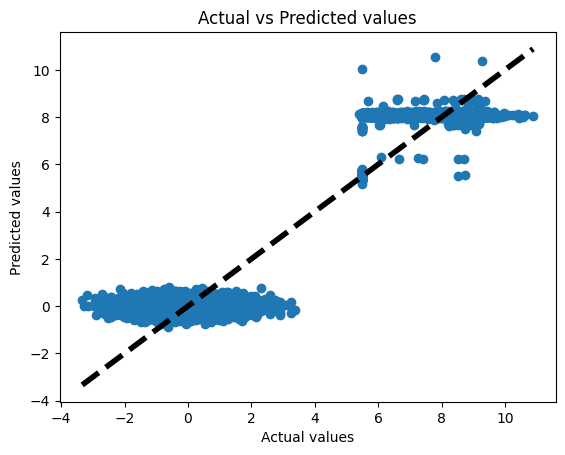

In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

# Fill missing values in target variable
#train['Target'].fillna(train['Target'].mean(), inplace=True)

# Define X and y
X = train[features]
y = train['Target']

# Impute missing values using SimpleImputer
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy='mean')
#X = imputer.fit_transform(X)

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
lr_y_pred = lr.predict(X_test)

print(f'The predicted values are: {lr_y_pred}')

# Evaluate the model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
print(f'The r2 score is : {r2_score(y_test, lr_y_pred)}')
print(f'The mean absolute error is : {mean_absolute_error(y_test, lr_y_pred)}')
print(f'The mean squared error is : {mean_squared_error(y_test, lr_y_pred)}')
print(f'The root mean squared error is : {np.sqrt(mean_squared_error(y_test, lr_y_pred))}')


# Visualize the model
plt.scatter(y_test, lr_y_pred)
# Add a line plot
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')


Text(0.5, 1.0, 'Coefficients of the features')

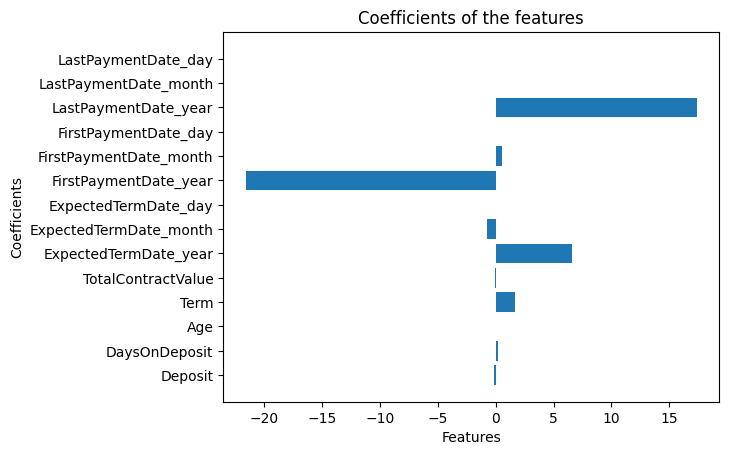

In [18]:
# Create a dataframe of the features and their coefficients
lr_coef = pd.DataFrame({'Features': features, 'Coefficients': lr.coef_})
lr_coef

# Plot the coefficients
plt.barh(lr_coef['Features'], lr_coef['Coefficients'])
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients of the features')

In [20]:
# Cross validate the model
lr_cv = cross_val_score(lr, X, y, cv=5)
lr_cv

# Get the mean of the cv scores
lr_cv_mean = np.mean(lr_cv)
lr_cv_mean

# Get the variance of the cv scores
lr_cv_var = np.var(lr_cv)
lr_cv_var

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [21]:

# Use the best parameters to create a new model
lr_grid_model = LinearRegression(copy_X=True, fit_intercept=True)
lr_grid_model.fit(X_train, y_train)# Use the cross_val_score to cross validate the new model
lr_grid_cv = cross_val_score(lr_grid_model, X, y, cv=5)
lr_grid_cv

array([-0.15045911, -0.30631248,  0.56068173,  0.89609789, -0.06862021])

Text(0.5, 1.0, 'Actual vs Predicted values')

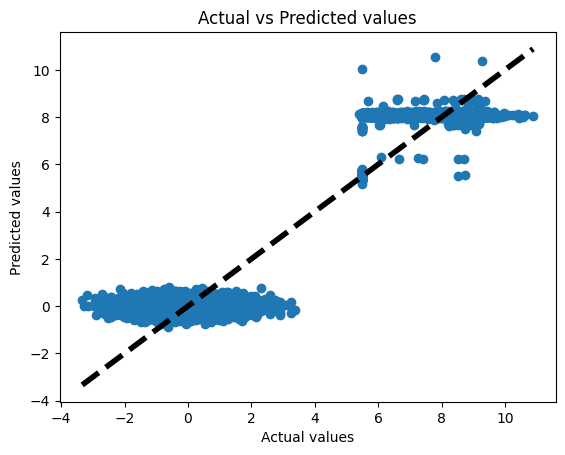

In [23]:
# Visualize the model
plt.scatter(y_test, lr_grid_model.predict(X_test))
# Add a line plot
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')


In [24]:
r2_score(y_test, lr_grid_model.predict(X_test))

0.9380749627539915

In [25]:
sample = pd.read_csv('SampleSubmission.csv')
sample.head()

,ID,Target
0,ID_6L67PAA x m1,0.0
1,ID_6L67PAA x m2,0.0
2,ID_6L67PAA x m3,0.0
3,ID_6L67PAA x m4,0.0
4,ID_6L67PAA x m5,0.0


In [26]:
# Make predictions on the test set
test = test[features]
test = scaler.fit_transform(test)
test_pred = lr.predict(test)
test_pred = np.round(test_pred, 1)
test_pred

array([ 8.1,  8.1, 10. , ...,  0. ,  0.3,  0.1])

In [27]:
# Create a dataframe
sub = pd.DataFrame({'ID': sample['ID'], 'Target': test_pred})
sub.shape

(56016, 2)

In [28]:
sub.to_csv('rolr.csv', index=False)

The predicted values are: [ 0.05485454  0.38216778  7.86719968 ... -0.15977907  0.0630709
 -0.02656659]
The r2 score is : 0.935921811389221
The mean absolute error is : 0.7881223073066649
The mean squared error is : 0.9884456839801974
The root mean squared error is : 0.9942060571029515


Text(0.5, 1.0, 'Actual vs Predicted values')

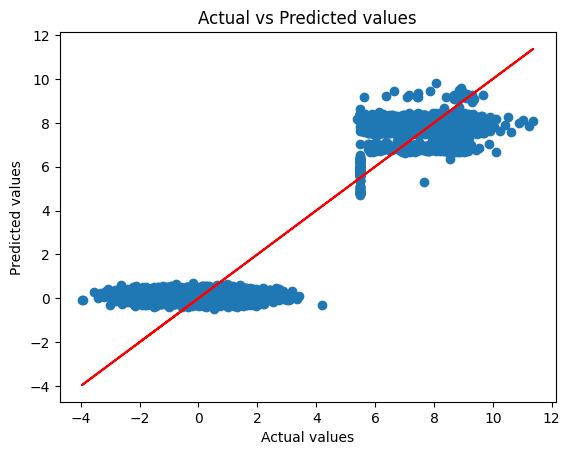

In [22]:
# Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Make predictions
lasso_y_pred = lasso.predict(X_test)
print(f'The predicted values are: {lasso_y_pred}')

# Evaluate the model
print(f'The r2 score is : {r2_score(y_test, lasso_y_pred)}')
print(f'The mean absolute error is : {mean_absolute_error(y_test, lasso_y_pred)}')
print(f'The mean squared error is : {mean_squared_error(y_test, lasso_y_pred)}')
print(f'The root mean squared error is : {np.sqrt(mean_squared_error(y_test, lasso_y_pred))}')

# Visualize the model
plt.scatter(y_test, lasso_y_pred)
# Add a line plot
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')


The predicted values are: [ 8.21635833 -0.25417153  9.19603859 ...  5.48479693  5.48479693
  8.61540824]
The r2 score is : 0.885893965087735
The mean absolute error is : 0.9025274470871412
The mean squared error is : 1.5995954072637328
The root mean squared error is : 1.2647511246343024


Text(0.5, 1.0, 'Actual vs Predicted values')

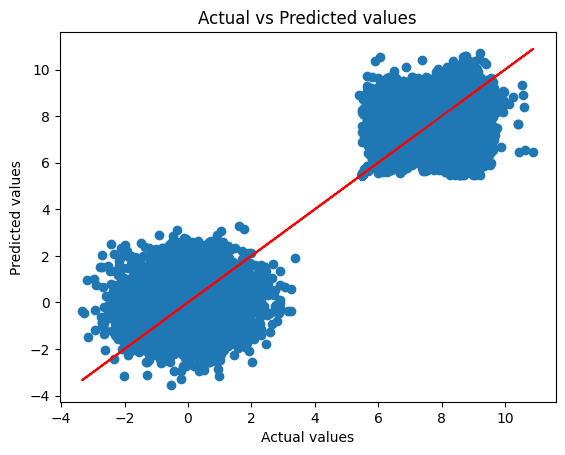

In [29]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Make predictions
dt_y_pred = dt.predict(X_test)
print(f'The predicted values are: {dt_y_pred}')

# Evaluate the model
print(f'The r2 score is : {r2_score(y_test, dt_y_pred)}')
print(f'The mean absolute error is : {mean_absolute_error(y_test, dt_y_pred)}')
print(f'The mean squared error is : {mean_squared_error(y_test, dt_y_pred)}')
print(f'The root mean squared error is : {np.sqrt(mean_squared_error(y_test, dt_y_pred))}')

# Visualize the model
plt.scatter(y_test, dt_y_pred)
# Add a line plot
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')

In [30]:
# Use GridSearchCV to find the best parameters
lr_params = {'fit_intercept': [True, False],
                'normalize': [True, False],
                'copy_X': [True, False]}

lr_grid = GridSearchCV(dt, lr_params, cv=5)

# Get the best parameters
lr_grid.best_params_

# Get the best score
lr_grid.best_score_

# Get the best estimator
lr_grid.best_estimator_

# Make predictions
lr_grid_y_pred = lr_grid.predict(X_test)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [31]:
preds = dt.predict(test)
preds = np.round(preds, 1)
preds

array([ 8.2,  8.5,  8.9, ..., -0.5, -1.7,  0.6])

In [26]:
sample['Target'] = preds
sample.to_csv('dt.csv', index=False)

The predicted values are: [-0.21264055  0.22507462  8.01561994 ... -0.39296471 -0.04079221
 -0.27621062]
The r2 score is : 0.9399781481097145
The mean absolute error is : 0.7361748792886396
The mean squared error is : 0.925874181709804
The root mean squared error is : 0.9622235611903317


Text(0.5, 1.0, 'Actual vs Predicted values')

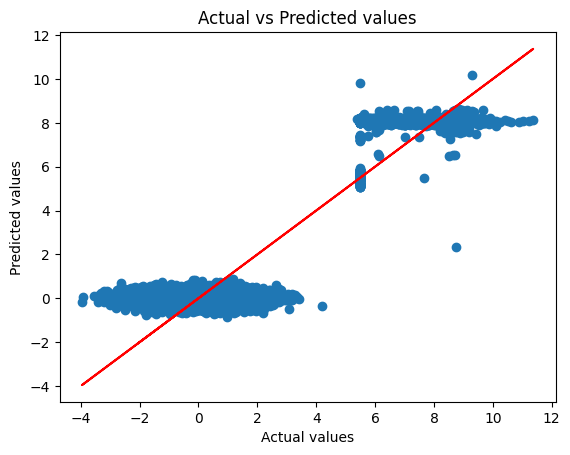

In [27]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# Make predictions
ridge_y_pred = ridge.predict(X_test)
print(f'The predicted values are: {ridge_y_pred}')

# Evaluate the model
print(f'The r2 score is : {r2_score(y_test, ridge_y_pred)}')
print(f'The mean absolute error is : {mean_absolute_error(y_test, ridge_y_pred)}')
print(f'The mean squared error is : {mean_squared_error(y_test, ridge_y_pred)}')
print(f'The root mean squared error is : {np.sqrt(mean_squared_error(y_test, ridge_y_pred))}')

# Visualize the model
plt.scatter(y_test, ridge_y_pred)
# Add a line plot
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')

The predicted values are: [8.3955138  0.06848818 8.74835652 ... 5.48479693 5.48479693 8.08782382]
The r2 score is : 0.9391301132169017
The mean absolute error is : 0.6735722268402663
The mean squared error is : 0.8533044848484327
The root mean squared error is : 0.9237448158709377


Text(0.5, 1.0, 'Actual vs Predicted values')

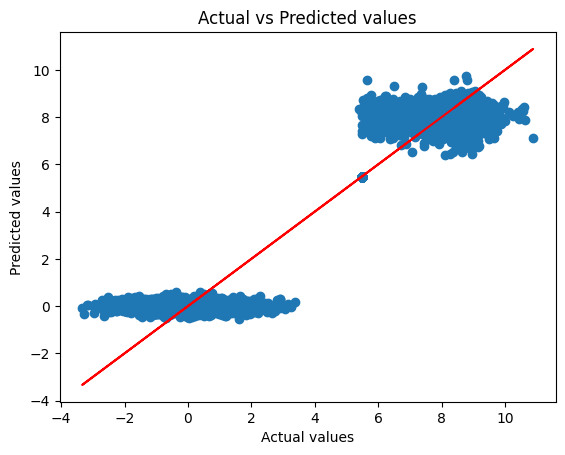

In [32]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf.predict(X_test)
print(f'The predicted values are: {rf_y_pred}')

# Evaluate the model
print(f'The r2 score is : {r2_score(y_test, rf_y_pred)}')
print(f'The mean absolute error is : {mean_absolute_error(y_test, rf_y_pred)}')
print(f'The mean squared error is : {mean_squared_error(y_test, rf_y_pred)}')
print(f'The root mean squared error is : {np.sqrt(mean_squared_error(y_test, rf_y_pred))}')

# Visualize the model
plt.scatter(y_test, rf_y_pred)
# Add a line plot
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')

In [ ]:
# From the above models, we can see that the Random Forest Regressor has the best performance although the line of best fit is not perfect. 
# It does not completely fit the data points.
# So we will try to improve the performance of the model by tuning the hyperparameters.

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
 # Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)
rf_random.fit(X_train, y_train)
 # Best parameters
rf_random.best_params_
# Predicting the Test set results
y_pred = rf_random.predict(X_test)
# Calculate the Root Mean Squared Error
np.sqrt(mean_squared_error(y_test, y_pred))

# Visualize the model
plt.scatter(y_test, y_pred)
# Add a line plot
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 2.7min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 2.7min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 3.1min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 2.8min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 2.9min
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=300; total time= 9.9min
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=300; 

In [ ]:
rf_new = RandomForestRegressor(bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900)
rf_new.fit(X_train, y_train)

# Visualize the model
plt.scatter(y_test, rf_new.predict(X_test))
# Add a line plot
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')

In [29]:
test = scaler.fit_transform(test)
rf_preds = rf.predict(test)
rf_preds = np.round(rf_preds, 1)

sample['Target'] = rf_preds
sample.to_csv('rf.csv', index=False)

The predicted values are: [ 0.1997037   0.06548454  8.135608   ... -0.34374717  0.2083652
  0.08650038]
The r2 score is : 0.9428564266733876
The mean absolute error is : 0.7032937098015442
The mean squared error is : 0.8814749549957556
The root mean squared error is : 0.9388689764795488


Text(0.5, 1.0, 'Actual vs Predicted values')

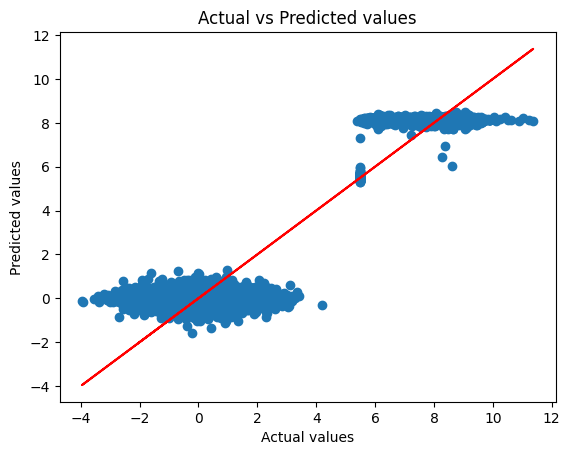

In [30]:
# XGboost
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

# Make predictions
xgb_y_pred = xgb.predict(X_test)
print(f'The predicted values are: {xgb_y_pred}')

# Evaluate the model
print(f'The r2 score is : {r2_score(y_test, xgb_y_pred)}')
print(f'The mean absolute error is : {mean_absolute_error(y_test, xgb_y_pred)}')
print(f'The mean squared error is : {mean_squared_error(y_test, xgb_y_pred)}')
print(f'The root mean squared error is : {np.sqrt(mean_squared_error(y_test, xgb_y_pred))}')

# Visualize the model
plt.scatter(y_test, xgb_y_pred)
# Add a line plot
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')

In [31]:
xgb_preds = xgb.predict(test)
xgb_preds = np.round(xgb_preds, 1)

sample['Target'] = xgb_preds
sample.to_csv('xgb.csv', index=False)

Epoch 1/100
1868/1868 [==============================] - 35s 13ms/step - loss: 1.3185 - val_loss: 0.9006
Epoch 2/100
1868/1868 [==============================] - 16s 9ms/step - loss: 0.9858 - val_loss: 0.9129
Epoch 3/100
1868/1868 [==============================] - 23s 12ms/step - loss: 0.9615 - val_loss: 0.9281
Epoch 4/100
1868/1868 [==============================] - 23s 12ms/step - loss: 0.9477 - val_loss: 0.9384
Epoch 5/100
1868/1868 [==============================] - 22s 12ms/step - loss: 0.9253 - val_loss: 0.9214
Epoch 6/100
1868/1868 [==============================] - 24s 13ms/step - loss: 0.9151 - val_loss: 0.9706
Epoch 7/100
1868/1868 [==============================] - 25s 13ms/step - loss: 0.9050 - val_loss: 0.9365
Epoch 8/100
1868/1868 [==============================] - 26s 14ms/step - loss: 0.8996 - val_loss: 1.1335
Epoch 9/100
1868/1868 [==============================] - 23s 12ms/step - loss: 0.8922 - val_loss: 0.9739
Epoch 10/100
1868/1868 [==============================] 

Text(0.5, 1.0, 'Actual vs Predicted values')

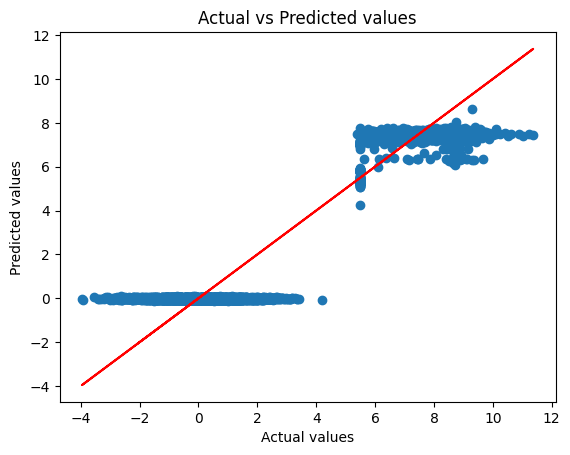

In [32]:
# neural network
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Create a model
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Create an early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Fit the model
model.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stop])

# Make predictions
nn_y_pred = model.predict(X_test)
print(f'The predicted values are: {nn_y_pred}')

# Evaluate the model
print(f'The r2 score is : {r2_score(y_test, nn_y_pred)}')
print(f'The mean absolute error is : {mean_absolute_error(y_test, nn_y_pred)}')
print(f'The mean squared error is : {mean_squared_error(y_test, nn_y_pred)}')
print(f'The root mean squared error is : {np.sqrt(mean_squared_error(y_test, nn_y_pred))}')

# Visualize the model
plt.scatter(y_test, nn_y_pred)
# Add a line plot
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')

In [72]:
# Predicting with the nn model
preds = model.predict(test)
print(f'The predicted values are: {preds}')

# Flatten the predictions
preds_flat = preds.flatten()
print(f'The flattened predicted values are: {preds_flat}')
preds_flat = np.round(preds_flat, 1)


# Create a dataframe
sub_nn = pd.DataFrame({"ID": sample["ID"], "Target": preds_flat})


1751/1751 [==============================] - 12s 7ms/step
The predicted values are: [[8.211647 ]
 [8.206126 ]
 [8.15852  ]
 ...
 [2.3710725]
 [2.387924 ]
 [2.374108 ]]


In [73]:
sub_nn.to_csv('neural_net.csv', index=False)

## Explaination on linear regression
* Linear regression analysis is the most widely used of all statistical techniques: it is the study of linear, additive relationships between variables.   Let Y denote the “dependent” variable whose values you wish to predict, and let X1, …,Xk denote the “independent” variables from which you wish to predict it, with the value of variable Xi in period t (or in row t of the data set) denoted by Xit.  
* Then the equation for computing the predicted value of Yt is:  Yt = β0 + β1X1t + … + βkXk.
* The coefficients β0, …,βk are called the regression coefficients.
* The regression coefficients are estimated using the method of least squares.  The least squares estimates minimize the sum of the squared residuals, where the residual is the difference between the observed value of Y and the predicted value of Y.  The least squares estimates are computed by finding the values of β0, …,βk that minimize the sum of the squared residuals.  The least squares estimates are unbiased, meaning that their expected value is equal to the true value of the regression coefficients.  The least squares estimates are also consistent, meaning that they converge to the true value of the regression coefficients as the sample size increases.
*